# Analysis

Fast notebook with some tables and plots to understand better how the algorithm
behaves on different datasets and with different parallel backends.

In [1]:
import pandas as pd
import plot

df = pd.read_csv("../results/cluster.csv")
plot.runtime_thread(df)

,estimators,max_depth,backend,threads,nodes,dataset,accuracy,f1,train_time,predict_time
0,8,0,seq,1,1,iris,0.966667,0.967963,0.904593,0.011003
1,16,0,ff,2,1,iris,0.966667,0.967963,1.735292,0.558586
2,16,0,ff,4,1,iris,0.966667,0.967963,1.641740,0.941271
3,16,0,ff,8,1,iris,0.966667,0.967963,1.908554,2.048200
4,16,0,ff,16,1,iris,0.966667,0.967963,3.260486,4.858932
...,...,...,...,...,...,...,...,...,...,...
366,256,0,omp,8,1,susy_20000,0.797500,0.796886,14043.160000,16.729980
367,256,0,omp,16,1,magic,0.878812,0.862193,3651.468000,7.948302
368,256,0,omp,16,1,susy_20000,0.797500,0.796886,7065.092000,9.115288
369,256,0,omp,32,1,magic,0.878812,0.862193,2598.250000,6.145700


In [ ]:
seq = df[df["backend"] == "seq"]

keys = ["estimators", "max_depth"]
merged = seq.merge(df, how="right", on=keys, suffixes=("_seq", "_mt"))

df["train_speedup"] = merged["train_time_seq"] / merged["train_time_mt"]
df["train_efficiency"] = df["train_speedup"] / merged["threads_mt"]

df

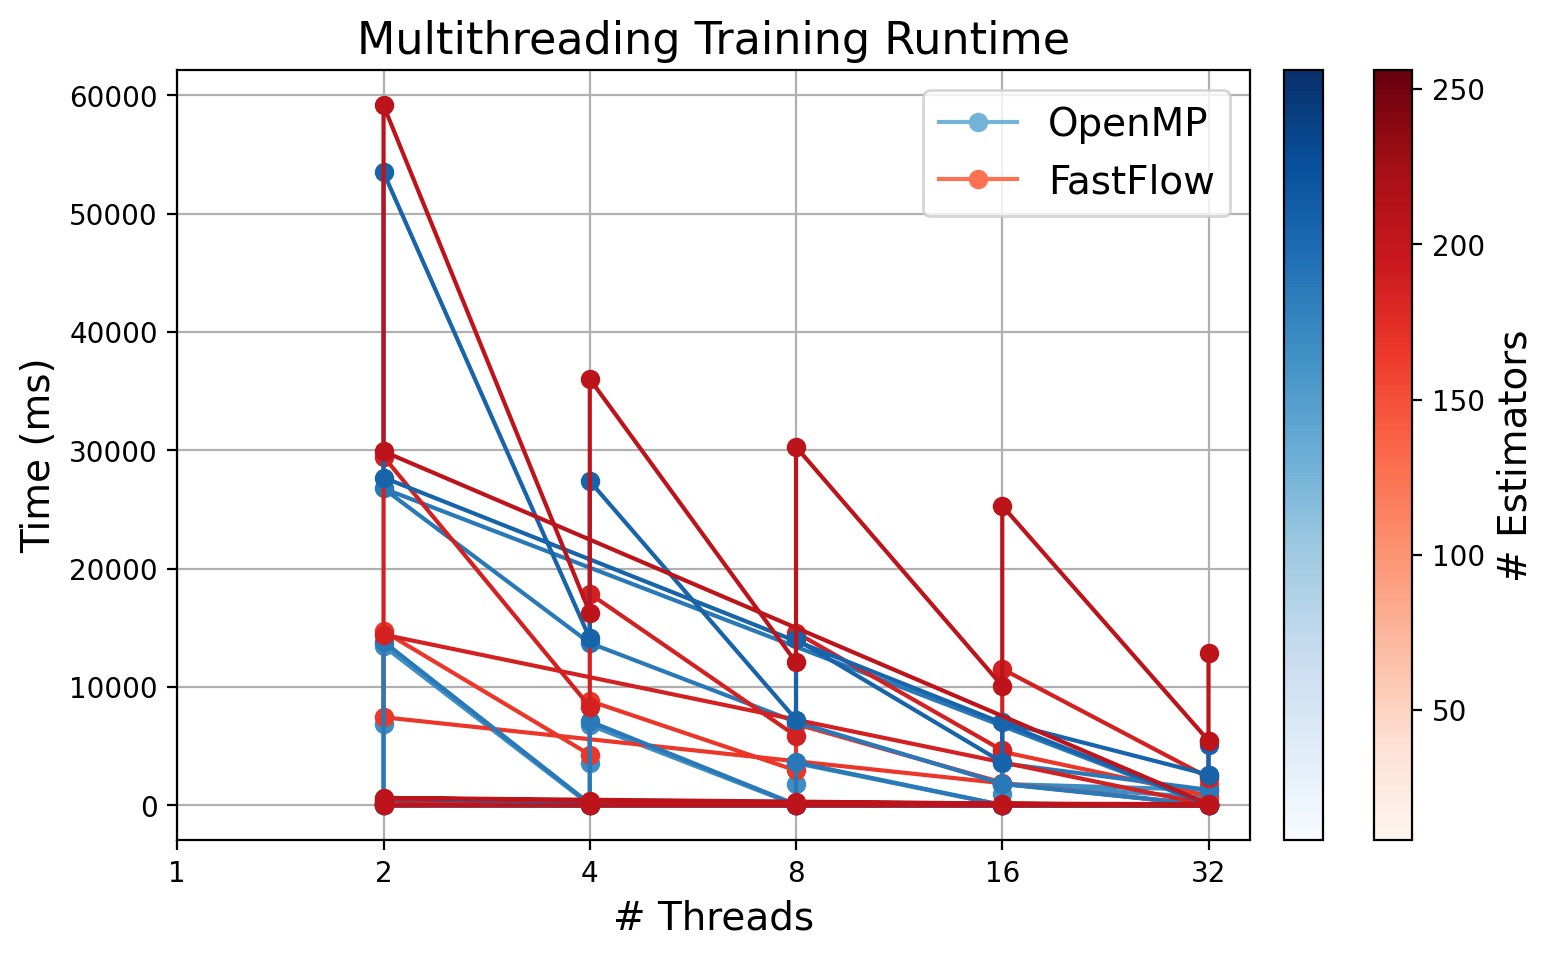

In [ ]:
import plot

plot.runtime(df)


omp = df[df["backend"] == "omp"]
omp = omp[omp["estimators"] >= 64]
ff = df[df["backend"] == "ff"]
ff = ff[ff["estimators"] >= 64]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Runtime", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["train_time"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["train_time"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
omp = omp[omp["estimators"] >= 64]
ff = df[df["backend"] == "ff"]
ff = ff[ff["estimators"] >= 64]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Speedup", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

ax.plot([1, 32], [1, 32], "g--")

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["train_speedup"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["train_speedup"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ideal_handle = plt.Line2D([], [], color="green", linestyle="--", label="Ideal Speedup")
ax.legend(handles=[omp_handle, ff_handle, ideal_handle], fontsize=14)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
omp = omp[omp["estimators"] >= 64]
ff = df[df["backend"] == "ff"]
ff = ff[ff["estimators"] >= 64]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Training Efficiency", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["train_efficiency"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["train_efficiency"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("Threads", fontsize=14)
ax.set_ylabel("Efficiency", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

In [ ]:
keys = ["estimators", "max_depth"]
merged = seq.merge(df, how="right", on=keys, suffixes=("_seq", "_mt"))

df["predict_speedup"] = merged["test_predict_time_seq"] / merged["test_predict_time_mt"]
df["predict_efficiency"] = df["predict_speedup"] / merged["threads_mt"]

df

In [ ]:
omp = df[df["backend"] == "omp"]
omp = omp[omp["estimators"] >= 64]
ff = df[df["backend"] == "ff"]
ff = ff[ff["estimators"] >= 64]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Runtime", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["test_predict_time"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["test_predict_time"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Time (ms)", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()

In [ ]:
omp = df[df["backend"] == "omp"]
omp = omp[omp["estimators"] >= 64]
ff = df[df["backend"] == "ff"]
ff = ff[ff["estimators"] >= 64]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Speedup", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

ax.plot([1, 32], [1, 32], "g--")

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["predict_speedup"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["predict_speedup"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Speedup", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ideal_handle = plt.Line2D([], [], color="green", linestyle="--", label="Ideal Speedup")
ax.legend(handles=[omp_handle, ff_handle, ideal_handle], fontsize=14)

plt.show()

In [ ]:
omp = df[df["backend"] == "omp"]
omp = omp[omp["estimators"] >= 64]
ff = df[df["backend"] == "ff"]
ff = ff[ff["estimators"] >= 64]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
ax.set_title("Multithreading Prediction Efficiency", fontsize=16)

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds = plt.cm.Reds(np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e = ff[ff["estimators"] == e]

    ax.plot(omp_e["threads"], omp_e["predict_efficiency"], marker="o", color=blues[i])

    ax.plot(ff_e["threads"], ff_e["predict_efficiency"], marker="o", color=reds[i])

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators", fontsize=14)
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("# Threads", fontsize=14)
ax.set_ylabel("Efficiency", fontsize=14)
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker="o", label="OpenMP")
ff_handle = plt.Line2D([], [], color=reds[1], marker="o", label="FastFlow")
ax.legend(handles=[omp_handle, ff_handle], fontsize=14)

plt.show()